In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
import os
os.chdir('./')

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,job_type,family_size,credit
0,0,1,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,1,0,NaN,2,1
1,1,1,0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,1,Laborers,3,1
2,2,0,1,1,450000.0,Working,Higher education,Married,House / apartment,1,0,Managers,2,2
3,3,1,0,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,Sales staff,2,0
4,4,1,1,1,157500.0,State servant,Higher education,Married,House / apartment,1,0,Managers,2,2


In [5]:
test.head()

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,job_type,family_size
0,22001,1,0,1,112500.0,Working,Incomplete higher,Civil marriage,House / apartment,1,0,NaN,2
1,22002,1,0,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,NaN,2
2,22003,0,1,1,225000.0,Pensioner,Higher education,Separated,House / apartment,1,0,NaN,1
3,22004,0,1,1,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,Rented apartment,1,1,Drivers,2
4,22005,1,0,0,202500.0,Working,Higher education,Married,Municipal apartment,1,0,NaN,3


In [6]:
train.shape

(22001, 14)

In [7]:
test.shape

(4456, 13)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22001 entries, 0 to 22000
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           22001 non-null  int64  
 1   gender          22001 non-null  int64  
 2   is_car          22001 non-null  int64  
 3   is_reality      22001 non-null  int64  
 4   income_year     22001 non-null  float64
 5   income_type     22001 non-null  object 
 6   edu_type        22001 non-null  object 
 7   marital status  22001 non-null  object 
 8   house_type      22001 non-null  object 
 9   is_mobile       22001 non-null  int64  
 10  is_email        22001 non-null  int64  
 11  job_type        15223 non-null  object 
 12  family_size     22001 non-null  int64  
 13  credit          22001 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 2.4+ MB


# **[데이터 전처리]**

## **결측치 제거** 

In [9]:
train.isnull().sum()

index                0
gender               0
is_car               0
is_reality           0
income_year          0
income_type          0
edu_type             0
marital status       0
house_type           0
is_mobile            0
is_email             0
job_type          6778
family_size          0
credit               0
dtype: int64

In [10]:
train=train.drop('job_type', axis=1)
test=test.drop('job_type', axis=1)

income_year
(2.544, 18.18]      13497
(18.18, 33.66]       6901
(33.66, 49.14]       1287
(49.14, 64.62]        177
(64.62, 80.1]          96
(80.1, 95.58]          33
(95.58, 111.06]         3
(111.06, 126.54]        1
(126.54, 142.02]        1
(142.02, 157.5]         5
Name: count, dtype: int64


<AxesSubplot: ylabel='Frequency'>

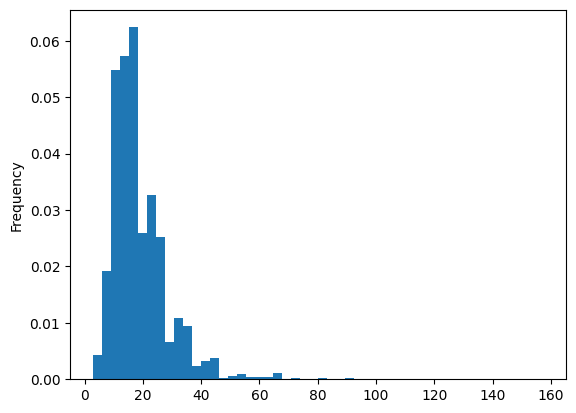

In [11]:
train['income_year'] = train['income_year'].astype(object)
train['income_year'] = train['income_year']/10000 
test['income_year'] = test['income_year']/10000

print(train['income_year'].value_counts(bins=10,sort=False))
train['income_year'].plot(kind='hist',bins=50,density=True)

In [12]:
count, bin_dividers =np.histogram(train['income_year'], bins=7)
bin_names=['소득'+str(i) for i in range(7) ]

train['income_year']=pd.cut(x=train['income_year'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_year']=pd.cut(x=test['income_year'], bins=bin_dividers, labels=bin_names, include_lowest=True)


In [13]:
test

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,family_size
0,22001,1,0,1,소득0,Working,Incomplete higher,Civil marriage,House / apartment,1,0,2
1,22002,1,0,0,소득0,Working,Secondary / secondary special,Married,House / apartment,1,0,2
2,22003,0,1,1,소득0,Pensioner,Higher education,Separated,House / apartment,1,0,1
3,22004,0,1,1,소득0,Commercial associate,Secondary / secondary special,Civil marriage,Rented apartment,1,1,2
4,22005,1,0,0,소득0,Working,Higher education,Married,Municipal apartment,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4451,26452,1,0,0,소득0,State servant,Secondary / secondary special,Married,House / apartment,1,0,4
4452,26453,1,0,1,소득0,Working,Higher education,Separated,House / apartment,1,0,2
4453,26454,1,1,0,소득1,Working,Secondary / secondary special,Civil marriage,With parents,1,0,2
4454,26455,0,0,1,소득0,Working,Incomplete higher,Single / not married,House / apartment,1,0,1


### **(3) Type**

In [14]:
print(train['income_year'].unique())
print(train['edu_type'].unique())
print(train['marital status'].unique())
print(train['house_type'].unique())

['소득0', '소득1', '소득2', '소득3', '소득4', '소득6', '소득5']
Categories (7, object): ['소득0' < '소득1' < '소득2' < '소득3' < '소득4' < '소득5' < '소득6']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [15]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])

train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])

train['marital status']=label_encoder.fit_transform(train['marital status'])
test['marital status']=label_encoder.transform(test['marital status'])

train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])

train['income_year']=label_encoder.fit_transform(train['income_year'])
test['income_year']=label_encoder.fit_transform(test['income_year'])

In [16]:
train.columns

Index(['index', 'gender', 'is_car', 'is_reality', 'income_year', 'income_type',
       'edu_type', 'marital status', 'house_type', 'is_mobile', 'is_email',
       'family_size', 'credit'],
      dtype='object')

In [17]:
train

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,family_size,credit
0,0,1,0,0,0,0,1,1,2,1,0,2,1
1,1,1,0,1,0,0,4,0,1,1,1,3,1
2,2,0,1,1,1,4,1,1,1,1,0,2,2
3,3,1,0,1,0,0,4,1,1,1,0,2,0
4,4,1,1,1,0,2,1,1,1,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,21996,0,0,1,1,4,4,2,1,1,0,1,1
21997,21997,0,1,1,1,4,4,1,5,1,0,3,2
21998,21998,1,0,1,0,4,3,1,1,1,0,2,1
21999,21999,1,0,1,0,0,4,1,1,1,0,2,2


In [18]:
test

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,family_size
0,22001,1,0,1,0,4,2,0,1,1,0,2
1,22002,1,0,0,0,4,4,1,1,1,0,2
2,22003,0,1,1,0,1,1,2,1,1,0,1
3,22004,0,1,1,0,0,4,0,4,1,1,2
4,22005,1,0,0,0,4,1,1,2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4451,26452,1,0,0,0,2,4,1,1,1,0,4
4452,26453,1,0,1,0,4,1,2,1,1,0,2
4453,26454,1,1,0,1,4,4,0,5,1,0,2
4454,26455,0,0,1,0,4,2,3,1,1,0,1


In [19]:
train.shape

(22001, 13)

In [20]:
test.shape

(4456, 12)

# **[데이터 모델링]**

In [21]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [22]:
print(train_x.shape, train_y.shape, test.shape)

(22001, 12) (22001, 1) (4456, 12)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

Train set: 
(16500, 12)
(16500, 1)
Validation set: 
(5501, 12)
(5501, 1)


In [24]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

In [25]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)

        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    return sub/folds.n_splits

my_submission = run_kfold(clf)

In [26]:
my_submission

array([[0.162, 0.286, 0.552],
       [0.186, 0.144, 0.67 ],
       [0.07 , 0.246, 0.684],
       ...,
       [0.136, 0.32 , 0.544],
       [0.068, 0.382, 0.55 ],
       [0.166, 0.136, 0.698]])

In [27]:
len(my_submission)

4456

In [28]:
answer_list = []
for i in my_submission:
    answer = i.argmax()
    answer_list.append(answer)

In [29]:
print(answer_list.count(0))
print(answer_list.count(1))
print(answer_list.count(2))

231
565
3660


In [30]:
submission

,index,credit
0,22001,0
1,22002,0
2,22003,0
3,22004,0
4,22005,0
...,...,...
4451,26452,0
4452,26453,0
4453,26454,0
4454,26455,0


In [35]:
submission['credit']=answer_list

In [36]:
submission

,index,credit
0,22001,2
1,22002,2
2,22003,2
3,22004,2
4,22005,2
...,...,...
4451,26452,2
4452,26453,2
4453,26454,2
4454,26455,2


In [ ]:
submission.to_csv('./baseline_submission.csv', index=False)